In [73]:
import pandas as pd
from datetime import datetime, timedelta

In [74]:
results_file = "/Users/vsai23/Workspace/PolygonBacktest/results/ep/targets_2014-01-01_2024-01-01.csv"
df = pd.read_csv(results_file)
rs = 0
winners = 0
tradesize=50

In [75]:
df.sort_values('date', inplace=True)
df['pl'] = None

In [76]:
for current_index in range(len(df)):
        row = df.iloc[current_index]
        _,symbol,date,stop,targets,trades,_ = row
                    
        # split the trades into a list of tuples
        trades = trades[2:-2].split('), (')
        trades = [trade.split(',') for trade in trades]
        trades = [(trade[0], float(trade[1]), float(trade[2])) for trade in trades]
        
        r = trades[0][1] - stop
        r = max(r, 0.01)
        
        total = 0
        # compute the r frm the rest of the trades
        for trade in trades[1:]:
            # round trade[2] to -1 or 1
            total += (trade[1] - trades[0][1])*(-trade[2])
        
        if total >= 0:
            winners += 1
        rs += total/r
        
        pl = tradesize*(total/r)
        
        # append the pl to the row
        df.at[current_index, 'pl'] = pl
        
        

<Axes: xlabel='date'>

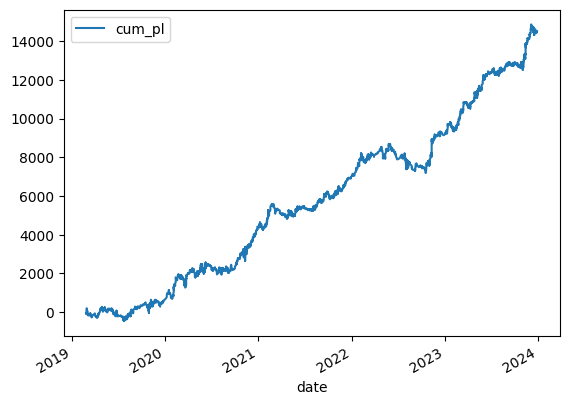

In [77]:
df['date'] = pd.to_datetime(df['date'])

# cumulative pl
df['cum_pl'] = df['pl'].cumsum()

# plot the cumulative pl
df.plot(x='date', y='cum_pl')


Maximum Drawdown: 1502.382404181184


<Axes: xlabel='date'>

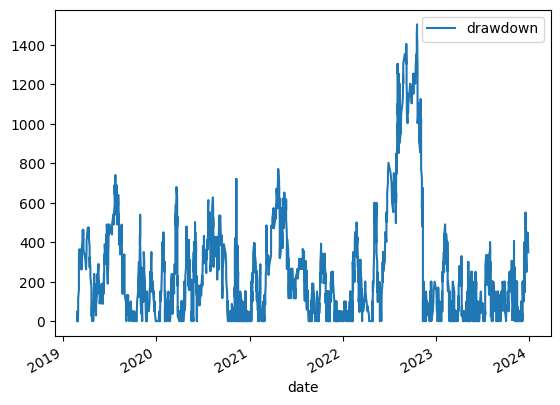

In [78]:
# Calculate the maximum drawdown
df['drawdown'] = df['cum_pl'].cummax() - df['cum_pl']
max_drawdown = df['drawdown'].max()

print("Maximum Drawdown:", max_drawdown)

df.plot(x='date', y='drawdown')

In [79]:
# Calculate the average return
average_return = df['pl'].mean()

# Calculate the standard deviation of the returns
std_dev = df['pl'].std()

# Calculate the Sharpe ratio
sharpe_ratio = average_return / std_dev

print("Sharpe Ratio Per Trade:", sharpe_ratio)

Sharpe Ratio Per Trade: 0.09098543234493314


In [63]:
weekly_pl = df.resample('W', on='date')['pl'].sum()

average_weekly_pl = weekly_pl.mean()

std_dev_weekly_pl = weekly_pl.std()

sharpe_ratio_weekly_pl = average_weekly_pl / std_dev_weekly_pl

print("Sharpe Ratio Per Week:", sharpe_ratio_weekly_pl)


Sharpe Ratio Per Week: 0.352996009158126


In [64]:
monthly_pl = df.resample('M', on='date')['pl'].sum()

average_monthly_pl = monthly_pl.mean()

std_dev_monthly_pl = monthly_pl.std()

sharpe_ratio_monthly_pl = average_monthly_pl / std_dev_monthly_pl

print("Sharpe Ratio Per Month:", sharpe_ratio_monthly_pl)

Sharpe Ratio Per Month: 0.5868684918627847


In [65]:
# import the polygon client
from clients.polygon import PolygonClient
from datetime import timedelta 

# create a polygon client
polygon = PolygonClient()
start_date = df['date'].iloc[0] - timedelta(days=200)
end_date = df['date'].iloc[-1]

spy_df = polygon.convert_aggs(polygon.get_stock_data("SPY", start_date, end_date))

spy_df['20MA'] = spy_df['close'].rolling(window=50).mean()
spy_df['50MA'] = spy_df['close'].rolling(window=200).mean()
spy_df['bull'] = spy_df['20MA'] >= spy_df['50MA']

# add a column to the original df for whether the spy is in a bull market
df = df.merge(spy_df[['time', 'bull']], left_on='date', right_on='time', how='left')
df.drop(columns='time', inplace=True)




Maximum Drawdown: 876.8214827391948
Sharpe Ratio Per Trade: 0.12053585065048736
Sharpe Ratio Per Week: 0.35328124598705574
Sharpe Ratio Per Month: 0.5883911168857965


/var/folders/h5/3j0f0wrs0b7btzg_w3kksr9m0000gn/T/ipykernel_49461/3523721884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cum_pl'] = df_filtered['pl'].cumsum()
/var/folders/h5/3j0f0wrs0b7btzg_w3kksr9m0000gn/T/ipykernel_49461/3523721884.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['drawdown'] = df_filtered['cum_pl'].cummax() - df_filtered['cum_pl']


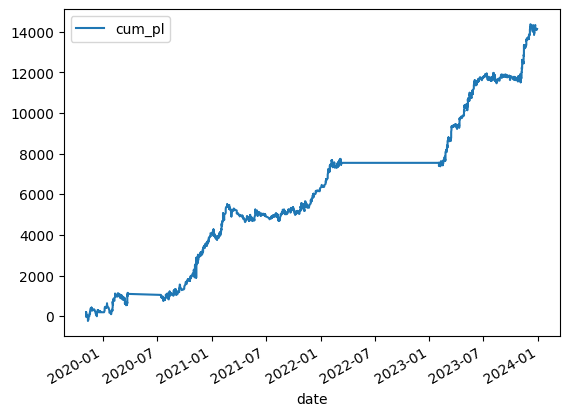

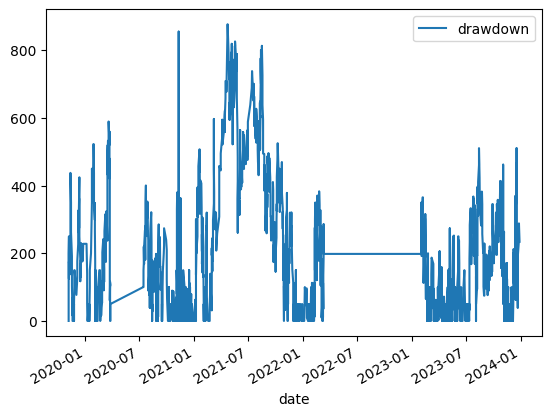

In [66]:
df_filtered = df[df['bull'] == True]
# cumulative pl
df_filtered['cum_pl'] = df_filtered['pl'].cumsum()

# plot the cumulative pl
df_filtered.plot(x='date', y='cum_pl')
# Calculate the average return

df_filtered['drawdown'] = df_filtered['cum_pl'].cummax() - df_filtered['cum_pl']
max_drawdown = df_filtered['drawdown'].max()

print("Maximum Drawdown:", max_drawdown)

df_filtered.plot(x='date', y='drawdown')

# Calculate the average return
average_return = df_filtered['pl'].mean()

# Calculate the standard deviation of the returns
std_dev = df_filtered['pl'].std()

# Calculate the Sharpe ratio
sharpe_ratio = average_return / std_dev

print("Sharpe Ratio Per Trade:", sharpe_ratio)

weekly_pl = df_filtered.resample('W', on='date')['pl'].sum()

average_weekly_pl = weekly_pl.mean()

std_dev_weekly_pl = weekly_pl.std()

sharpe_ratio_weekly_pl = average_weekly_pl / std_dev_weekly_pl

print("Sharpe Ratio Per Week:", sharpe_ratio_weekly_pl)

monthly_pl = df_filtered.resample('M', on='date')['pl'].sum()

average_monthly_pl = monthly_pl.mean()

std_dev_monthly_pl = monthly_pl.std()

sharpe_ratio_monthly_pl = average_monthly_pl / std_dev_monthly_pl

print("Sharpe Ratio Per Month:", sharpe_ratio_monthly_pl)


In [67]:
# pull the start and end dates from the df
start_date = df['date'].iloc[0]
end_date = df['date'].iloc[-1]

# import the polygon client
from clients.polygon import PolygonClient
# create a polygon client
polygon = PolygonClient()

# get the SPY data from polygon
spy_data = polygon.convert_aggs(polygon.get_stock_data("SPY", start_date, end_date))

In [68]:
# Calculate the monthly returns
monthly_returns = df_filtered.resample('M', on='date')['pl'].sum()
monthly_portfolio_value = monthly_returns.cumsum() + tradesize*100

# calculate the monthly returns for the monthly portfolio value
monthly_portfolio_returns = monthly_portfolio_value.pct_change()

# calculate the monthly returns for SPY
spy_monthly_returns = spy_data.resample('M', on='time')['close'].last().pct_change()


In [69]:
# Calculate the covariance between stock returns and market returns
covariance = monthly_portfolio_returns.cov(spy_monthly_returns)

# Calculate the variance of market returns
variance = spy_monthly_returns.var()

# Calculate the beta
beta = covariance / variance

print("Beta:", beta)


Beta: 0.04883011277247915


In [71]:
from numpy import NaN


risk_free_rate = 0.0481
market_return = 0.07

# calculate the df annual returns
annual_returns = df_filtered.resample('Y', on='date')['pl'].sum()

# add an extra 0 at the front of annual returns
extra_row = pd.Series(0, index=[annual_returns.index[0] - pd.DateOffset(years=1)])
annual_returns = pd.concat([extra_row, annual_returns])

# calculate the cumusum 
annual_returns = annual_returns.cumsum() + tradesize*100

# calculate the percentage annual returns
annual_returns = annual_returns.pct_change()

# calculate the alpha for the portfolio per year
alpha = annual_returns - (risk_free_rate + beta * (market_return - risk_free_rate))

for index, value in alpha.items():
    if str(value) != 'nan':
        print("Alpha for {}: {}".format(index.year, value))

Alpha for 2019: -0.010398080977903915
Alpha for 2020: 0.6998815218909592
Alpha for 2021: 0.1936031341381041
Alpha for 2022: 0.06251098099610679
Alpha for 2023: 0.476127991858537
